# Benchmark Comparison and Visualization

This notebook compares multiple benchmark results and creates visualizations.

## Usage
1. Paste multiple JSON benchmark summaries in the list below
2. Optionally add labels for each benchmark
3. Run the cells to see comparisons and visualizations

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from typing import Any

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Input: Paste your benchmark JSONs here

In [24]:
# List of benchmark JSON strings
benchmark_jsons = [
    # Example - replace with your actual benchmark JSONs
    '{"benchmarks": {"resolve_circuit": {"duration_s": 0.74, "mem_before_mb": 363.07, "mem_after_mb": 364.21, "mem_delta_mb": 1.14, "peak_mem_mb": 364.23}, "add_node_set": {"duration_s": 1.39, "mem_before_mb": 364.21, "mem_after_mb": 389.75, "mem_delta_mb": 25.53, "peak_mem_mb": 389.75}, "split_subcircuit": {"duration_s": 1151.99, "mem_before_mb": 389.75, "mem_after_mb": 739.34, "mem_delta_mb": 349.59, "peak_mem_mb": 1582.74}, "copy_morph_hoc_mod": {"duration_s": 5.65, "mem_before_mb": 739.34, "mem_after_mb": 739.34, "mem_delta_mb": 0.0, "peak_mem_mb": 739.34}, "register_circuit_entity": {"duration_s": 0.1, "mem_before_mb": 739.34, "mem_after_mb": 739.34, "mem_delta_mb": 0.0, "peak_mem_mb": 739.34}, "register_circuit_folder_asset": {"duration_s": 1.8, "mem_before_mb": 739.34, "mem_after_mb": 739.34, "mem_delta_mb": 0.0, "peak_mem_mb": 739.34}, "run_circuit_folder_compression": {"duration_s": 0.5, "mem_before_mb": 739.34, "mem_after_mb": 739.34, "mem_delta_mb": 0.0, "peak_mem_mb": 739.34}, "add_compressed_circuit_asset": {"duration_s": 0.3, "mem_before_mb": 739.34, "mem_after_mb": 739.34, "mem_delta_mb": 0.0, "peak_mem_mb": 739.34}, "run_connectivity_matrix_extraction": {"duration_s": 0.55, "mem_before_mb": 739.34, "mem_after_mb": 748.24, "mem_delta_mb": 8.91, "peak_mem_mb": 748.24}, "add_connectivity_matrix_asset": {"duration_s": 0.3, "mem_before_mb": 748.24, "mem_after_mb": 748.24, "mem_delta_mb": 0.0, "peak_mem_mb": 748.24}, "run_basic_connectivity_plots": {"duration_s": 3.74, "mem_before_mb": 748.24, "mem_after_mb": 855.5, "mem_delta_mb": 107.26, "peak_mem_mb": 941.91}, "add_connectivity_plot_assets": {"duration_s": 3.12, "mem_before_mb": 855.5, "mem_after_mb": 838.95, "mem_delta_mb": -16.55, "peak_mem_mb": 977.85}, "generate_overview_figures": {"duration_s": 0.9, "mem_before_mb": 838.95, "mem_after_mb": 854.67, "mem_delta_mb": 15.72, "peak_mem_mb": 854.67}, "add_overview_figure_assets": {"duration_s": 1.11, "mem_before_mb": 854.67, "mem_after_mb": 839.01, "mem_delta_mb": -15.66, "peak_mem_mb": 915.57}, "cleanup": {"duration_s": 0.1, "mem_before_mb": 839.01, "mem_after_mb": 839.01, "mem_delta_mb": 0.0, "peak_mem_mb": 839.01}}, "benchmarked_time_s": 1172.29, "total_execution_time_s": 1172.49, "unbenchmarked_time_s": 0.2, "unbenchmarked_percentage": 0.0}',
    '{"benchmarks": {"resolve_circuit": {"duration_s": 0.5, "mem_before_mb": 364.07, "mem_after_mb": 364.68, "mem_delta_mb": 0.62, "peak_mem_mb": 364.68}, "add_node_set": {"duration_s": 1.03, "mem_before_mb": 364.68, "mem_after_mb": 391.36, "mem_delta_mb": 26.67, "peak_mem_mb": 395.07}, "split_subcircuit": {"duration_s": 1081.79, "mem_before_mb": 391.36, "mem_after_mb": 738.82, "mem_delta_mb": 347.46, "peak_mem_mb": 1582.95}, "copy_morph_hoc_mod": {"duration_s": 24.87, "mem_before_mb": 738.82, "mem_after_mb": 738.82, "mem_delta_mb": 0.0, "peak_mem_mb": 738.82}, "register_circuit_entity": {"duration_s": 0.2, "mem_before_mb": 738.82, "mem_after_mb": 738.82, "mem_delta_mb": 0.0, "peak_mem_mb": 738.82}, "register_circuit_folder_asset": {"duration_s": 2.01, "mem_before_mb": 738.82, "mem_after_mb": 738.82, "mem_delta_mb": 0.0, "peak_mem_mb": 738.82}, "run_circuit_folder_compression": {"duration_s": 3.81, "mem_before_mb": 738.82, "mem_after_mb": 738.82, "mem_delta_mb": 0.0, "peak_mem_mb": 738.82}, "add_compressed_circuit_asset": {"duration_s": 0.6, "mem_before_mb": 738.82, "mem_after_mb": 738.82, "mem_delta_mb": 0.0, "peak_mem_mb": 738.82}, "run_connectivity_matrix_extraction": {"duration_s": 0.1, "mem_before_mb": 738.82, "mem_after_mb": 738.82, "mem_delta_mb": 0.0, "peak_mem_mb": 738.82}, "run_basic_connectivity_plots": {"duration_s": 0.1, "mem_before_mb": 738.82, "mem_after_mb": 738.82, "mem_delta_mb": 0.0, "peak_mem_mb": 738.82}, "generate_overview_figures": {"duration_s": 0.1, "mem_before_mb": 738.82, "mem_after_mb": 738.82, "mem_delta_mb": 0.0, "peak_mem_mb": 738.82}, "add_overview_figure_assets": {"duration_s": 27.3, "mem_before_mb": 738.82, "mem_after_mb": 754.43, "mem_delta_mb": 15.61, "peak_mem_mb": 754.43}, "cleanup": {"duration_s": 0.1, "mem_before_mb": 754.43, "mem_after_mb": 754.43, "mem_delta_mb": 0.0, "peak_mem_mb": 754.43}}, "benchmarked_time_s": 1142.51, "total_execution_time_s": 1142.62, "unbenchmarked_time_s": 0.11, "unbenchmarked_percentage": 0.0}',
    '{"benchmarks": {"resolve_circuit": {"duration_s": 0.6, "mem_before_mb": 364.01, "mem_after_mb": 364.69, "mem_delta_mb": 0.68, "peak_mem_mb": 364.7}, "add_node_set": {"duration_s": 1.48, "mem_before_mb": 364.69, "mem_after_mb": 390.03, "mem_delta_mb": 25.34, "peak_mem_mb": 390.03}, "split_subcircuit": {"duration_s": 1063.07, "mem_before_mb": 390.03, "mem_after_mb": 739.98, "mem_delta_mb": 349.95, "peak_mem_mb": 1584.7}, "copy_morph_hoc_mod": {"duration_s": 129.95, "mem_before_mb": 739.98, "mem_after_mb": 739.98, "mem_delta_mb": 0.0, "peak_mem_mb": 739.98}, "register_circuit_entity": {"duration_s": 0.1, "mem_before_mb": 739.98, "mem_after_mb": 739.98, "mem_delta_mb": 0.0, "peak_mem_mb": 739.98}, "register_circuit_folder_asset": {"duration_s": 8.72, "mem_before_mb": 739.98, "mem_after_mb": 739.98, "mem_delta_mb": 0.0, "peak_mem_mb": 739.98}, "run_circuit_folder_compression": {"duration_s": 45.73, "mem_before_mb": 739.98, "mem_after_mb": 739.98, "mem_delta_mb": 0.0, "peak_mem_mb": 739.98}, "add_compressed_circuit_asset": {"duration_s": 2.81, "mem_before_mb": 739.98, "mem_after_mb": 739.98, "mem_delta_mb": 0.0, "peak_mem_mb": 739.98}, "run_connectivity_matrix_extraction": {"duration_s": 0.1, "mem_before_mb": 739.98, "mem_after_mb": 739.98, "mem_delta_mb": 0.0, "peak_mem_mb": 739.98}, "run_basic_connectivity_plots": {"duration_s": 0.1, "mem_before_mb": 739.98, "mem_after_mb": 739.98, "mem_delta_mb": 0.0, "peak_mem_mb": 739.98}, "generate_overview_figures": {"duration_s": 0.1, "mem_before_mb": 739.98, "mem_after_mb": 739.98, "mem_delta_mb": 0.0, "peak_mem_mb": 739.98}, "add_overview_figure_assets": {"duration_s": 40.82, "mem_before_mb": 739.98, "mem_after_mb": 755.46, "mem_delta_mb": 15.48, "peak_mem_mb": 755.46}, "cleanup": {"duration_s": 0.1, "mem_before_mb": 755.46, "mem_after_mb": 755.46, "mem_delta_mb": 0.0, "peak_mem_mb": 755.46}}, "benchmarked_time_s": 1293.68, "total_execution_time_s": 1293.8, "unbenchmarked_time_s": 0.12, "unbenchmarked_percentage": 0.0}',
    '{"benchmarks": {"resolve_circuit": {"duration_s": 0.61, "mem_before_mb": 364.76, "mem_after_mb": 365.38, "mem_delta_mb": 0.62, "peak_mem_mb": 365.39}, "add_node_set": {"duration_s": 1.25, "mem_before_mb": 365.38, "mem_after_mb": 392.58, "mem_delta_mb": 27.2, "peak_mem_mb": 392.58}, "split_subcircuit": {"duration_s": 1004.04, "mem_before_mb": 392.58, "mem_after_mb": 780.14, "mem_delta_mb": 387.56, "peak_mem_mb": 1631.67}, "copy_morph_hoc_mod": {"duration_s": 560.12, "mem_before_mb": 780.14, "mem_after_mb": 780.14, "mem_delta_mb": 0.0, "peak_mem_mb": 780.14}, "register_circuit_entity": {"duration_s": 0.1, "mem_before_mb": 780.14, "mem_after_mb": 780.14, "mem_delta_mb": 0.0, "peak_mem_mb": 780.14}, "register_circuit_folder_asset": {"duration_s": 23.95, "mem_before_mb": 780.14, "mem_after_mb": 780.14, "mem_delta_mb": 0.0, "peak_mem_mb": 780.14}, "run_circuit_folder_compression": {"duration_s": 411.81, "mem_before_mb": 780.14, "mem_after_mb": 771.35, "mem_delta_mb": -8.79, "peak_mem_mb": 780.14}, "add_compressed_circuit_asset": {"duration_s": 7.02, "mem_before_mb": 771.35, "mem_after_mb": 771.35, "mem_delta_mb": 0.0, "peak_mem_mb": 771.35}, "run_connectivity_matrix_extraction": {"duration_s": 0.1, "mem_before_mb": 771.35, "mem_after_mb": 771.35, "mem_delta_mb": 0.0, "peak_mem_mb": 771.35}, "run_basic_connectivity_plots": {"duration_s": 0.1, "mem_before_mb": 771.35, "mem_after_mb": 771.35, "mem_delta_mb": 0.0, "peak_mem_mb": 771.35}, "generate_overview_figures": {"duration_s": 0.1, "mem_before_mb": 771.35, "mem_after_mb": 770.7, "mem_delta_mb": -0.65, "peak_mem_mb": 771.35}, "add_overview_figure_assets": {"duration_s": 40.01, "mem_before_mb": 770.7, "mem_after_mb": 772.25, "mem_delta_mb": 1.55, "peak_mem_mb": 772.25}, "cleanup": {"duration_s": 0.1, "mem_before_mb": 772.25, "mem_after_mb": 772.25, "mem_delta_mb": 0.0, "peak_mem_mb": 772.25}}, "benchmarked_time_s": 2049.31, "total_execution_time_s": 2049.43, "unbenchmarked_time_s": 0.12, "unbenchmarked_percentage": 0.0}',
]

# Optional: Labels for each benchmark (e.g., circuit size, configuration)
# If not provided, will use "Run 1", "Run 2", etc.
benchmark_labels = [
    "nbS1-HEX0 (10 neurons)",
    "nbS1-HEX0 (100 neurons)",
    "nbS1-HEX0 (1000 neurons)",
    "nbS1-HEX0 (10000 neurons)",
]

circuit_names = [
    "nbS1-HEX0",
    "nbS1-HEX0",
    "nbS1-HEX0",
    "nbS1-HEX0",
]

# Circuit sizes for scaling analysis (tuples with source/target size)
circuit_sizes = [
    (30190, 10),
    (30190, 100),
    (30190, 1000),
    (30190, 10000),
]

## Parse and convert to DataFrame

In [15]:
def parse_benchmarks(json_strings: list[str], labels: list[str] | None = None) -> pd.DataFrame:
    """Parse benchmark JSONs and convert to a pandas DataFrame."""
    if labels is None:
        labels = [f"Run {i+1}" for i in range(len(json_strings))]
    
    if len(labels) != len(json_strings):
        raise ValueError(f"Number of labels ({len(labels)}) must match number of benchmarks ({len(json_strings)})")
    
    rows = []
    
    for label, json_str in zip(labels, json_strings):
        data = json.loads(json_str)
        benchmarks = data.get("benchmarks", {})
        
        # Add overall metrics
        row = {
            "label": label,
            "benchmarked_time_s": data.get("benchmarked_time_s"),
            "total_execution_time_s": data.get("total_execution_time_s"),
            "unbenchmarked_time_s": data.get("unbenchmarked_time_s"),
            "unbenchmarked_percentage": data.get("unbenchmarked_percentage"),
        }
        
        # Add individual section metrics
        for section_name, section_data in benchmarks.items():
            row[f"{section_name}_duration_s"] = section_data.get("duration_s")
            row[f"{section_name}_mem_delta_mb"] = section_data.get("mem_delta_mb")
            row[f"{section_name}_peak_mem_mb"] = section_data.get("peak_mem_mb")
        
        rows.append(row)
    
    return pd.DataFrame(rows)


# Parse the benchmarks
df = parse_benchmarks(benchmark_jsons, benchmark_labels)
print("Benchmark DataFrame:")
display(df)

Benchmark DataFrame:


,label,benchmarked_time_s,total_execution_time_s,unbenchmarked_time_s,unbenchmarked_percentage,resolve_circuit_duration_s,resolve_circuit_mem_delta_mb,resolve_circuit_peak_mem_mb,add_node_set_duration_s,add_node_set_mem_delta_mb,...,add_connectivity_plot_assets_peak_mem_mb,generate_overview_figures_duration_s,generate_overview_figures_mem_delta_mb,generate_overview_figures_peak_mem_mb,add_overview_figure_assets_duration_s,add_overview_figure_assets_mem_delta_mb,add_overview_figure_assets_peak_mem_mb,cleanup_duration_s,cleanup_mem_delta_mb,cleanup_peak_mem_mb
0,nbS1-HEX0 (10 neurons),1172.29,1172.49,0.20,0.0,0.74,1.14,364.23,1.39,25.53,...,977.85,0.9,15.72,854.67,1.11,-15.66,915.57,0.1,0.0,839.01
1,nbS1-HEX0 (100 neurons),1142.51,1142.62,0.11,0.0,0.50,0.62,364.68,1.03,26.67,...,NaN,0.1,0.00,738.82,27.30,15.61,754.43,0.1,0.0,754.43
2,nbS1-HEX0 (1000 neurons),1293.68,1293.80,0.12,0.0,0.60,0.68,364.70,1.48,25.34,...,NaN,0.1,0.00,739.98,40.82,15.48,755.46,0.1,0.0,755.46
3,nbS1-HEX0 (10000 neurons),2049.31,2049.43,0.12,0.0,0.61,0.62,365.39,1.25,27.20,...,NaN,0.1,-0.65,771.35,40.01,1.55,772.25,0.1,0.0,772.25


## Summary Statistics

In [16]:
# Show summary of key metrics
summary_cols = ["label", "total_execution_time_s", "benchmarked_time_s", "unbenchmarked_time_s", "unbenchmarked_percentage"]
summary_df = df[summary_cols]
print("\nExecution Time Summary:")
display(summary_df)


Execution Time Summary:


,label,total_execution_time_s,benchmarked_time_s,unbenchmarked_time_s,unbenchmarked_percentage
0,nbS1-HEX0 (10 neurons),1172.49,1172.29,0.20,0.0
1,nbS1-HEX0 (100 neurons),1142.62,1142.51,0.11,0.0
2,nbS1-HEX0 (1000 neurons),1293.80,1293.68,0.12,0.0
3,nbS1-HEX0 (10000 neurons),2049.43,2049.31,0.12,0.0


## Visualization 1: Total Execution Time Comparison

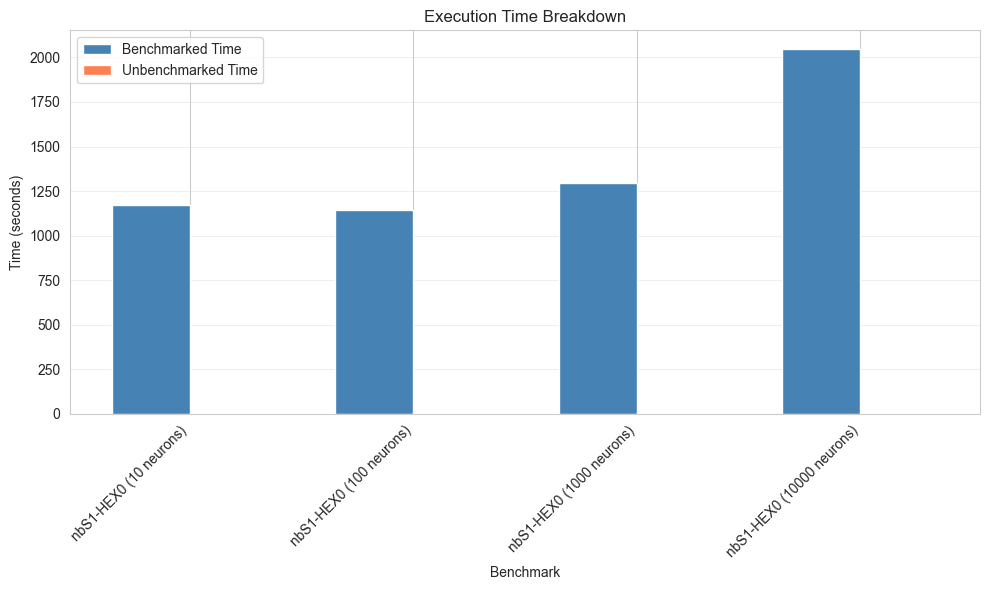

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(df))
width = 0.35

ax.bar([i - width/2 for i in x], df['benchmarked_time_s'], width, label='Benchmarked Time', color='steelblue')
ax.bar([i + width/2 for i in x], df['unbenchmarked_time_s'], width, label='Unbenchmarked Time', color='coral')

ax.set_xlabel('Benchmark')
ax.set_ylabel('Time (seconds)')
ax.set_title('Execution Time Breakdown')
ax.set_xticks(x)
ax.set_xticklabels(df['label'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Visualization 2: Section Duration Comparison

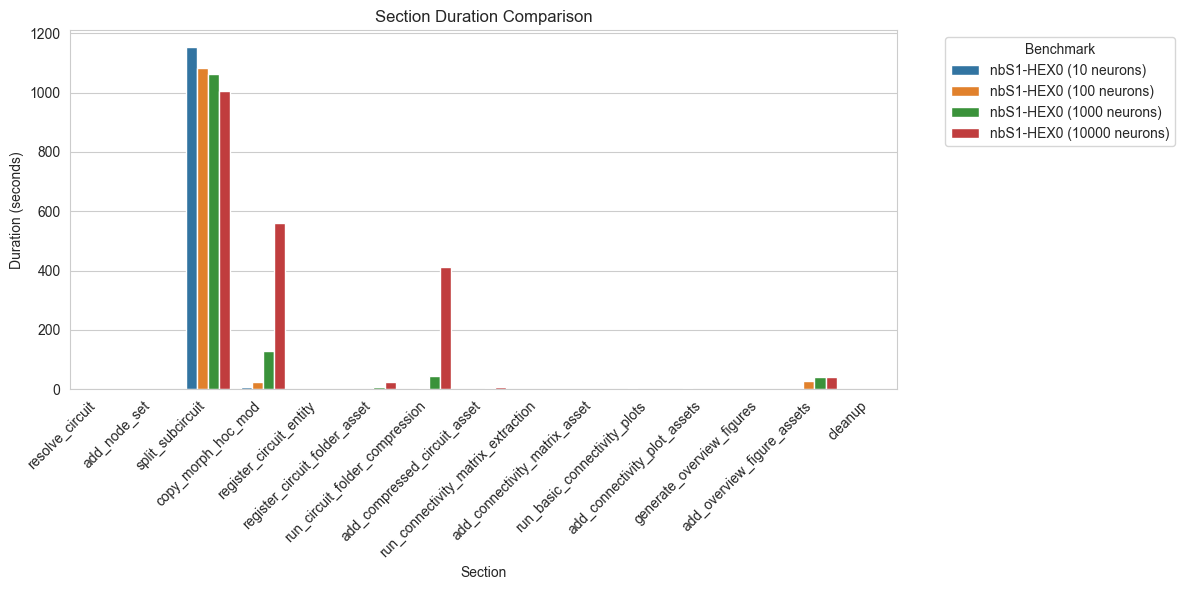

In [18]:
# Extract section duration columns
duration_cols = [col for col in df.columns if col.endswith('_duration_s')]

if duration_cols:
    # Create a DataFrame for section durations
    section_data = df[['label'] + duration_cols].copy()
    section_data.columns = ['label'] + [col.replace('_duration_s', '') for col in duration_cols]
    
    # Melt for easier plotting
    section_melted = section_data.melt(id_vars='label', var_name='Section', value_name='Duration (s)')
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(data=section_melted, x='Section', y='Duration (s)', hue='label', ax=ax)
    ax.set_title('Section Duration Comparison')
    ax.set_xlabel('Section')
    ax.set_ylabel('Duration (seconds)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Benchmark', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("No section duration data found.")

## Visualization 3: Peak Memory Usage

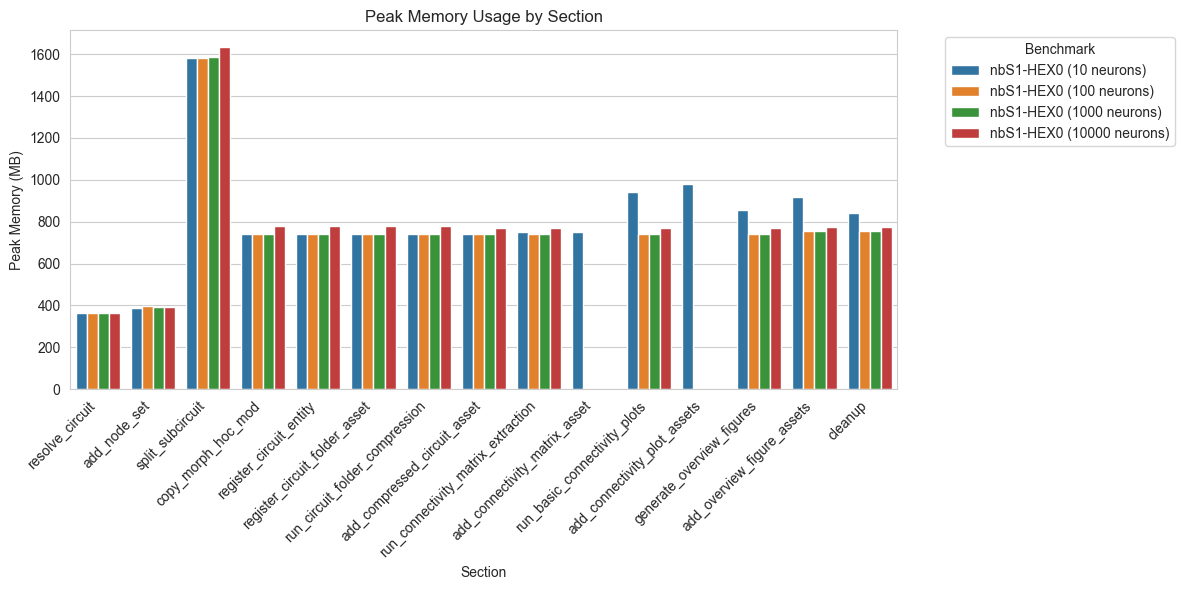

In [19]:
# Extract peak memory columns
peak_mem_cols = [col for col in df.columns if col.endswith('_peak_mem_mb')]

if peak_mem_cols:
    # Create a DataFrame for peak memory
    mem_data = df[['label'] + peak_mem_cols].copy()
    mem_data.columns = ['label'] + [col.replace('_peak_mem_mb', '') for col in peak_mem_cols]
    
    # Melt for easier plotting
    mem_melted = mem_data.melt(id_vars='label', var_name='Section', value_name='Peak Memory (MB)')
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(data=mem_melted, x='Section', y='Peak Memory (MB)', hue='label', ax=ax)
    ax.set_title('Peak Memory Usage by Section')
    ax.set_xlabel('Section')
    ax.set_ylabel('Peak Memory (MB)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Benchmark', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("No peak memory data found.")

## Visualization 4: Stacked Time Breakdown

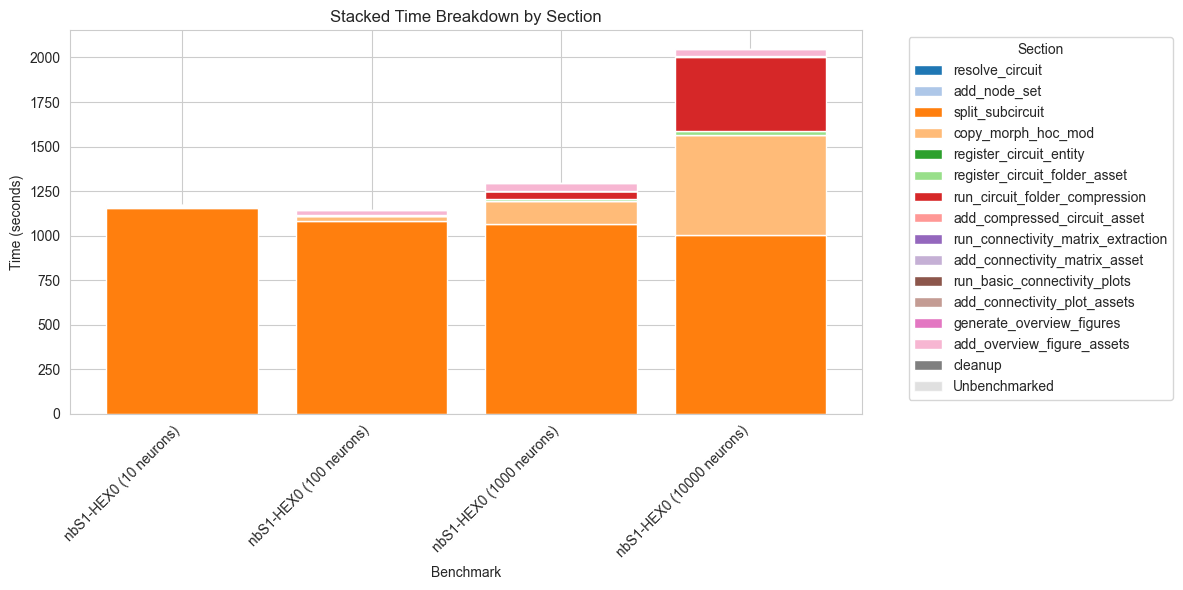

In [20]:
if duration_cols:
    # Prepare data for stacked bar chart
    section_names = [col.replace('_duration_s', '') for col in duration_cols]
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create stacked bars
    bottom = [0] * len(df)
    colors = plt.cm.tab20(range(len(duration_cols)))
    
    for i, col in enumerate(duration_cols):
        section_name = section_names[i]
        values = df[col].fillna(0)
        ax.bar(df['label'], values, bottom=bottom, label=section_name, color=colors[i])
        bottom = [b + v for b, v in zip(bottom, values)]
    
    # Add unbenchmarked time on top
    if 'unbenchmarked_time_s' in df.columns:
        ax.bar(df['label'], df['unbenchmarked_time_s'].fillna(0), bottom=bottom, 
               label='Unbenchmarked', color='lightgray', alpha=0.7)
    
    ax.set_xlabel('Benchmark')
    ax.set_ylabel('Time (seconds)')
    ax.set_title('Stacked Time Breakdown by Section')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Section', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("No section duration data found.")

## Visualization 5: Scaling Analysis (Metric vs Target Circuit Size)

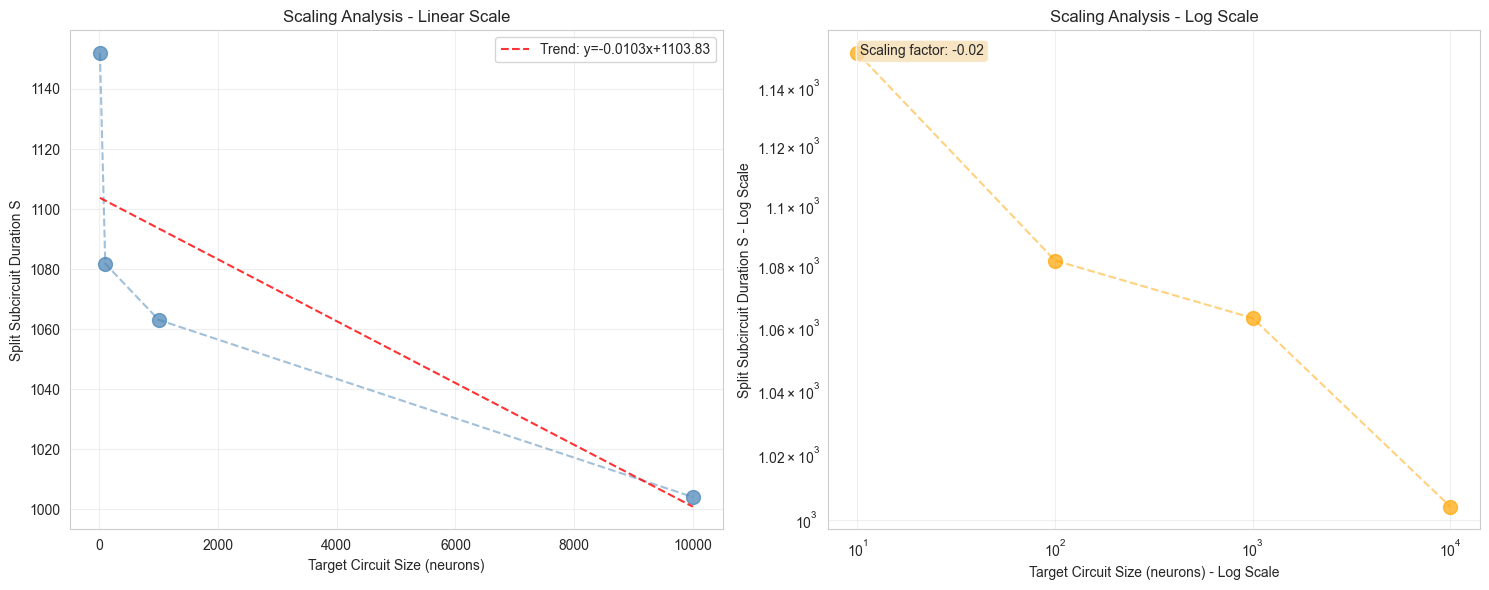


Scaling Analysis Summary for split_subcircuit_duration_s:
--------------------------------------------------
Target size:     10 neurons -> split_subcircuit_duration_s:  1151.99s
Target size:    100 neurons -> split_subcircuit_duration_s:  1081.79s
Target size:   1000 neurons -> split_subcircuit_duration_s:  1063.07s
Target size:  10000 neurons -> split_subcircuit_duration_s:  1004.04s

Size increased by factor: 1000.0
Metric increased by factor: 1.1


In [21]:
# Check if circuit_sizes data is available
if 'circuit_sizes' in locals() and circuit_sizes:
    # Extract target sizes from circuit_sizes tuples
    target_sizes = [size[1] for size in circuit_sizes]
    
    # Select a metric to analyze (you can change this)
    metric_column = 'split_subcircuit_duration_s'  # Change this to analyze different metrics
    # metric_column = 'run_circuit_folder_compression_duration_s'
    
    if metric_column in df.columns:
        # Create scaling analysis plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Linear scale plot
        metric_values = df[metric_column].fillna(0)
        ax1.scatter(target_sizes, metric_values, s=100, alpha=0.7, color='steelblue')
        ax1.plot(target_sizes, metric_values, '--', alpha=0.5, color='steelblue')
        
        # Add trend line
        if len(target_sizes) > 1:
            z = np.polyfit(target_sizes, metric_values, 1)
            p = np.poly1d(z)
            ax1.plot(target_sizes, p(target_sizes), "r--", alpha=0.8, label=f'Trend: y={z[0]:.4f}x+{z[1]:.2f}')
            ax1.legend()
        
        ax1.set_xlabel('Target Circuit Size (neurons)')
        ax1.set_ylabel(f'{metric_column.replace("_", " ").title()}')
        ax1.set_title('Scaling Analysis - Linear Scale')
        ax1.grid(True, alpha=0.3)
        
        # Log scale plot (if values are positive)
        if all(val > 0 for val in metric_values) and all(size > 0 for size in target_sizes):
            ax2.scatter(target_sizes, metric_values, s=100, alpha=0.7, color='orange')
            ax2.plot(target_sizes, metric_values, '--', alpha=0.5, color='orange')
            ax2.set_xscale('log')
            ax2.set_yscale('log')
            ax2.set_xlabel('Target Circuit Size (neurons) - Log Scale')
            ax2.set_ylabel(f'{metric_column.replace("_", " ").title()} - Log Scale')
            ax2.set_title('Scaling Analysis - Log Scale')
            ax2.grid(True, alpha=0.3)
            
            # Calculate scaling factor (slope in log-log plot)
            if len(target_sizes) > 1:
                log_sizes = np.log10(target_sizes)
                log_values = np.log10(metric_values)
                scaling_factor = np.polyfit(log_sizes, log_values, 1)[0]
                ax2.text(0.05, 0.95, f'Scaling factor: {scaling_factor:.2f}', 
                        transform=ax2.transAxes, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))
        else:
            ax2.text(0.5, 0.5, 'Log scale not applicable\n(zero or negative values)', 
                    ha='center', va='center', transform=ax2.transAxes)
            ax2.set_title('Log Scale - Not Applicable')
        
        plt.tight_layout()
        plt.show()
        
        # Print scaling summary
        print(f"\nScaling Analysis Summary for {metric_column}:")
        print("-" * 50)
        for i, (size, value) in enumerate(zip(target_sizes, metric_values)):
            print(f"Target size: {size:>6} neurons -> {metric_column}: {value:>8.2f}s")
        
        if len(target_sizes) > 1:
            size_ratio = max(target_sizes) / min(target_sizes)
            value_ratio = max(metric_values) / min(metric_values) if min(metric_values) > 0 else float('inf')
            print(f"\nSize increased by factor: {size_ratio:.1f}")
            print(f"Metric increased by factor: {value_ratio:.1f}")
            
    else:
        print(f"Metric column '{metric_column}' not found in data.")
        print("Available metric columns:")
        metric_cols = [col for col in df.columns if col.endswith('_duration_s') or col.endswith('_peak_mem_mb')]
        for col in metric_cols:
            print(f"  - {col}")
else:
    print("Circuit size data not available. Please define 'circuit_sizes' variable.")
    print("Example: circuit_sizes = [(source_size1, target_size1), (source_size2, target_size2), ...]")

## Generate Markdown Table for GitHub Issues

In [25]:
# Generate a markdown table for easy copy-paste into GitHub issues
def generate_github_markdown_table(df, circuit_sizes=None, circuit_names=None):
    """Generate a markdown table with key benchmark metrics."""
    
    # Extract key columns
    table_data = []
    for idx, row in df.iterrows():
        # Use circuit_names if available, otherwise fall back to label
        if circuit_names and idx < len(circuit_names):
            benchmark_name = circuit_names[idx]
        else:
            benchmark_name = row['label']
        
        table_row = {
            'Circuit': benchmark_name,
        }
        
        # Add circuit sizes if available
        if circuit_sizes and idx < len(circuit_sizes):
            source_size, target_size = circuit_sizes[idx]
            table_row['Source Size'] = str(source_size)
            table_row['Target Size'] = str(target_size)
        
        table_row.update({
            'Split Subcircuit (s)': f"{row.get('split_subcircuit_duration_s', 0):.2f}",
            'Folder Compression (s)': f"{row.get('run_circuit_folder_compression_duration_s', 0):.2f}",
            'Total Time (s)': f"{row['total_execution_time_s']:.2f}",
            'Total Memory (MB)': f"{row.get('split_subcircuit_peak_mem_mb', 0):.0f}"
        })
        table_data.append(table_row)
    
    # Generate markdown
    headers = list(table_data[0].keys())
    
    # Header row
    md_table = '| ' + ' | '.join(headers) + ' |\n'
    
    # Separator row
    md_table += '| ' + ' | '.join(['---'] * len(headers)) + ' |\n'
    
    # Data rows
    for row in table_data:
        md_table += '| ' + ' | '.join(str(row[h]) for h in headers) + ' |\n'
    
    return md_table

# Generate and print the markdown table
try:
    # Try to use circuit_names if available
    try:
        markdown_table = generate_github_markdown_table(df, circuit_sizes, circuit_names)
    except NameError:
        # circuit_names not defined, try with just circuit_sizes
        markdown_table = generate_github_markdown_table(df, circuit_sizes)
except NameError:
    # circuit_sizes not defined either, generate without it
    markdown_table = generate_github_markdown_table(df)

print("\nMarkdown Table for GitHub Issues:")
print("=" * 80)
print(markdown_table)
print("=" * 80)
print("\nCopy the table above and paste it into your GitHub issue!")


Markdown Table for GitHub Issues:
| Circuit | Source Size | Target Size | Split Subcircuit (s) | Folder Compression (s) | Total Time (s) | Total Memory (MB) |
| --- | --- | --- | --- | --- | --- | --- |
| nbS1-HEX0 | 30190 | 10 | 1151.99 | 0.50 | 1172.49 | 1583 |
| nbS1-HEX0 | 30190 | 100 | 1081.79 | 3.81 | 1142.62 | 1583 |
| nbS1-HEX0 | 30190 | 1000 | 1063.07 | 45.73 | 1293.80 | 1585 |
| nbS1-HEX0 | 30190 | 10000 | 1004.04 | 411.81 | 2049.43 | 1632 |


Copy the table above and paste it into your GitHub issue!


## Export DataFrame to CSV (Optional)

In [ ]:
# Uncomment to save the DataFrame to CSV
# df.to_csv('benchmark_comparison.csv', index=False)
# print("DataFrame saved to benchmark_comparison.csv")